In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('homeprice_onehot.csv')

In [3]:
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,61000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


In [4]:
# create dummies
dummies=pd.get_dummies(data.town)
dummies

,monroe township,robbinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [5]:
new_data=pd.concat([data,dummies],axis=1)
new_data

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,61000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robbinsville,2600,575000,0,1,0


### Another method for 1 Hot encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
enc=OneHotEncoder()

In [8]:
enc.fit_transform(data[['town']])

<13x3 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [9]:
enc.fit_transform(data[['town']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
data1=pd.DataFrame(enc.fit_transform(data[['town']]).toarray(), columns=['monroe township','west windsor','robbinsville'])

In [11]:
data1

,monroe township,west windsor,robbinsville
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [12]:
new_data=pd.concat([data,data1],axis=1)

# also we can use-: data.join(x,y)

In [13]:
new_data

,town,area,price,monroe township,west windsor,robbinsville
0,monroe township,2600,550000,1.0,0.0,0.0
1,monroe township,3000,565000,1.0,0.0,0.0
2,monroe township,3200,61000,1.0,0.0,0.0
3,monroe township,3600,680000,1.0,0.0,0.0
4,monroe township,4000,725000,1.0,0.0,0.0
5,west windsor,2600,585000,0.0,0.0,1.0
6,west windsor,2800,615000,0.0,0.0,1.0
7,west windsor,3300,650000,0.0,0.0,1.0
8,west windsor,3600,710000,0.0,0.0,1.0
9,robbinsville,2600,575000,0.0,1.0,0.0


In [14]:
data_new=new_data.drop('town',axis=1)

In [15]:
data_new

,area,price,monroe township,west windsor,robbinsville
0,2600,550000,1.0,0.0,0.0
1,3000,565000,1.0,0.0,0.0
2,3200,61000,1.0,0.0,0.0
3,3600,680000,1.0,0.0,0.0
4,4000,725000,1.0,0.0,0.0
5,2600,585000,0.0,0.0,1.0
6,2800,615000,0.0,0.0,1.0
7,3300,650000,0.0,0.0,1.0
8,3600,710000,0.0,0.0,1.0
9,2600,575000,0.0,1.0,0.0


In [16]:
x=data_new.drop('price',axis=1)
y=data_new['price']

In [17]:
model=LinearRegression()

In [18]:
model.fit(x,y)

LinearRegression()

In [19]:
y_pred=model.predict(x)

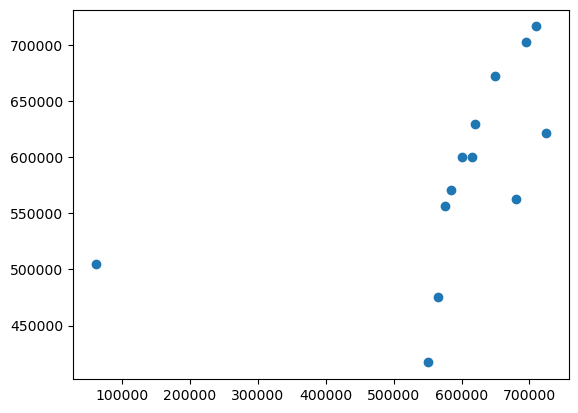

In [20]:
plt.scatter(y,y_pred)

In [21]:
model.score(x,y)

0.26760244239734743

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y,y_pred)

19108477630.947853

In [24]:
model.predict([[3200,0,1,0]])

C:\Users\Amjad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([644367.55536443])

### Boston dataset problem

In [26]:
import pandas as pd
# from sklearn.datasets import load_boston

In [27]:
boston=pd.read_csv('Boston.csv')

In [28]:
boston=boston.drop('Unnamed: 0',axis=1)

In [29]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [30]:
x=boston.drop('medv',axis=1)
y=boston['medv']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)

In [33]:
x_train.shape,y_train.shape

((354, 13), (354,))

In [34]:
x_test.shape,y_test.shape

((152, 13), (152,))

In [35]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
238,0.08244,30.0,4.93,0,0.4280,6.481,18.5,6.1899,6,300,16.6,379.41,6.36
94,0.04294,28.0,15.04,0,0.4640,6.249,77.3,3.6150,4,270,18.2,396.90,10.59
132,0.59005,0.0,21.89,0,0.6240,6.372,97.9,2.3274,4,437,21.2,385.76,11.12
366,3.69695,0.0,18.10,0,0.7180,4.963,91.4,1.7523,24,666,20.2,316.03,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,14.23620,0.0,18.10,0,0.6930,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
343,0.02543,55.0,3.78,0,0.4840,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
192,0.08664,45.0,3.44,0,0.4370,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
387,22.59710,0.0,18.10,0,0.7000,5.000,89.5,1.5184,24,666,20.2,396.90,31.99


In [37]:
model=LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
print(model.intercept_)
print(model.coef_)

29.50038564969838
[-5.84015348e-02  3.74009981e-02 -9.18952118e-03  2.98640550e+00
 -1.29791828e+01  4.27902999e+00 -8.50890017e-03 -1.39726186e+00
  2.39477386e-01 -1.16953033e-02 -8.52512252e-01  1.04780793e-02
 -5.07993450e-01]


In [41]:
y_pred=model.predict(x_test)

In [43]:
prediction_table=pd.DataFrame({'Target y values':y_test,'Predicted y values':y_pred})
prediction_table

,Target y values,Predicted y values
368,50.0,22.428472
105,19.5,18.585825
269,20.7,25.898037
119,19.3,20.811499
351,24.1,20.917347
...,...,...
406,11.9,7.540803
51,20.5,23.773287
504,22.0,26.895954
324,25.0,25.707492


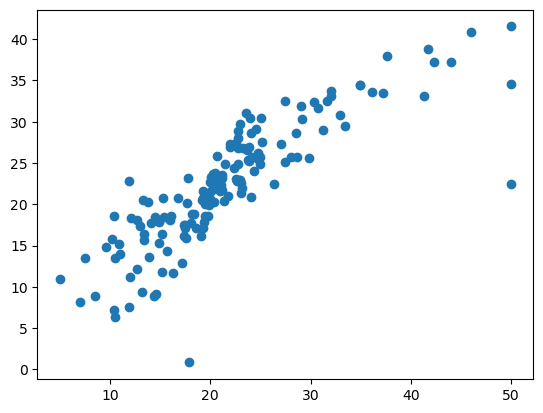

In [44]:
plt.scatter(y_test,y_pred)

In [45]:
# Evaluating model on training data
model.score(x_train,y_train)

0.7447438990204566

In [46]:
# Evaluating model on testing data
model.score(x_test,y_test)

0.713343114412345

## Hiring Data Dataset

In [48]:
import pandas  as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [49]:
data=pd.read_csv('hiring.csv')

In [52]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [53]:
data.experience=data.experience.fillna('zero')

In [54]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [55]:
score_mean=data['test_score(out of 10)'].mean()

In [56]:
score_mean

7.857142857142857

In [57]:
import math
score_mean=math.floor(score_mean)

In [58]:
score_mean

7

In [59]:
data['test_score(out of 10)']=data['test_score(out of 10)'].fillna(score_mean)

In [60]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [65]:
# pip install word2number
# is used for changing one-> 1 integer(word 2 number) 

In [62]:
from word2number import w2n

In [63]:
data.experience=data.experience.apply(w2n.word_to_num)

In [64]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [67]:
x=data.drop('salary($)',axis=1)
y=data['salary($)']

In [68]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [69]:
model.score(x,y)

0.9770139014273139

In [71]:
model.predict([[0,8,9]])

C:\Users\Amjad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52090.46734071])